# Машинное обучение и анализ данных 2023

Для начала импортируем всевозможные модули для выполнения домашних заданий (будет пополнятся по мере необходимости)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
import seaborn as sea
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPRegressor

## Домашнее задание №3

### Задания

0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы 
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

### 0. Описание задачи

Этот набор данных предоставляет из себя обширную информацию обо всех странах мира, охватывая широкий спектр показателей стран. Он включает в себя демографическую статистику, экономические показатели, факторы окружающей среды, показатели здравоохранения, статистику образования и многое другое. Этот набор данных, предлагает провести достаточно глубокий анализ, для выявления различного рода закономерностей. С практической точки зрения, результаты могут показывать вектор развития для целой страны с целью увеличения уровня благосостояния, одним из аспектов которых является качество жизни обычных людей.

Скачан с сайта kaggle (https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)

Если же говорить о том, какая работа может быть совершена над датасетом, то тут можно выбрать много интересных тем, перечислим некоторые из них:

1. Изучите корреляции между экономическими показателями, такими как ВВП, и различными социально-экономическими факторами
2. Изучить уровень охвата образованием и его влияние на развитие человеческого капитала
3. Изучите тенденции урбанизации и их социальные и экологические последствия
4. И много другое :)

Всего: 195 уникальных наблюдений \
Признаки: 35 разнородных факторов \
Наличие пропущенных значений: Присутствуют, связанно с невозможностью получения данных данной страны по разного рода причинам \
Выбросы: Присутствуют, связанны с различными историческими предпосылками по данным странам

### 1. Чтение данных

**Country**: Название страны [Название]

**Density**: Плотность населения. [Популяция людей/км^2]

**Abbreviation**: Аббревиатура или код, обозначающий страну [Название]

**Agricultural Land**: Земли сельскохозяйственного назначения [Процент от общей площади страны]

**Land Area**: Общая площадь страны [км^2]

**Armed Forces size**: Численность вооруженных сил в стране [Число]

**Birth Rate**: Число рождений на 1000 населения в год [Число]

**Calling Code**: Международный телефонный код страны [Число]

**Capital/Major City**: Название столицы или крупного города [Название]

**Co2-Emissions**: Выбросы углекислого газа в тоннах [Число]

**CPI**: Индекс потребительских цен, показатель инфляции и покупательной способности [Число]

**CPI Change**: Процентное изменение индекса потребительских цен по сравнению с предыдущим годом. [Процент]

**Currency-Code**: Код валюты, используемый в стране [Название]

**Fertility Rate**: Среднее число детей, рожденных женщиной за всю жизнь [Число]

**Forested Area**: Процент территории, покрытой лесами [Процент]

**Gasoline Price**: Цена бензина за литр в долларах США [Число]

**GDP**: Валовой внутренний продукт — общая стоимость товаров и услуг, произведенных в стране [Число]

**Gross primary education enrollment**: Валовой коэффициент охвата начальным образованием [Процент]

**Gross tertiary education enrollment**: Валовой коэффициент охвата высшим образованием [Процент]

**Infant mortality**: Число смертей на 1000 живорождений в возрасте до одного года [Число]

**Largest city**: Название крупнейшего города страны [Название]

**Life expectancy**: Среднее количество лет, которое, как ожидается, проживет новорожденный [Число]

**Maternal mortality ratio**: Число материнских смертей на 100 000 живорождений [Число]

**Minimum wage**: Уровень минимальной заработной платы в местной валюте [Число]

**Official language**: Официальный язык, на котором говорят в стране [Название]

**Out of pocket health expenditure**: Процент общих расходов на здравоохранение, оплачиваемых физическими лицами из собственного кармана [Процент]

**Physicians per thousand**: Количество врачей на 1000 человек [Число]

**Population**: Общая численность населения страны [Число]

**Population: Labor force participation**: Процент населения, входящего в состав рабочей силы [Процент]

**Tax revenue**: Налоговые поступления в процентах от ВВП [Процент]

**Total tax rate**: Общая налоговая нагрузка в процентах от коммерческой прибыли [Процент]

**Unemployment rate**: Процент рабочей силы, которая является безработной [Процент]

**Urban_population**: Население, проживающее в городских районах [Число]

**Latitude**: Координата широты местоположения страны [Число]

**Longitude**: Долгота координаты местоположения страны [Число]

### 2. Визуализировать данные и вычислить основные характеристики. Интерпретировать их

Для начала визуализируем датасет непосредственно в ноутбуке. Из-за большого числа строк будет автоматически представлено лишь начало и конец сета

In [3]:
data = pd.read_csv('world-data-2023.csv')
data

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


Можно воспользоваться встроенными функциями для анализа данных, но у нас присутствуют уникальные значения в некоторых колонках, они же еще и в частности строковые опустим их из анализа. И мы можем видеть размерность нашего датасета встроенными возможностями ноутбука, 195 строк и 35 колонок

Приступим к описательным статистикам, с помощью describe() мы получим удобную таблицу

In [4]:
data.describe(include='all')

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195,195,188,188,194,171,189.000000,194.000000,192,188,...,188,188.000000,194,176,169,183,176,190,194.000000,194.000000
unique,195,137,188,168,194,105,NaN,NaN,192,184,...,160,NaN,194,145,119,156,164,190,NaN,NaN
top,Afghanistan,25,AF,17.40%,"652,230","2,000",NaN,NaN,Kabul,143,...,40.50%,NaN,"38,041,754",68.80%,19.50%,36.60%,4.59%,"9,797,273",NaN,NaN
freq,1,7,1,3,1,7,NaN,NaN,1,2,...,3,NaN,1,3,4,4,3,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,20.214974,360.546392,NaN,NaN,...,NaN,1.839840,NaN,NaN,NaN,NaN,NaN,NaN,19.092351,20.232434
std,NaN,NaN,NaN,NaN,NaN,NaN,9.945774,323.236419,NaN,NaN,...,NaN,1.684261,NaN,NaN,NaN,NaN,NaN,NaN,23.961779,66.716110
min,NaN,NaN,NaN,NaN,NaN,NaN,5.900000,1.000000,NaN,NaN,...,NaN,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,-40.900557,-175.198242
25%,NaN,NaN,NaN,NaN,NaN,NaN,11.300000,82.500000,NaN,NaN,...,NaN,0.332500,NaN,NaN,NaN,NaN,NaN,NaN,4.544175,-7.941496
50%,NaN,NaN,NaN,NaN,NaN,NaN,17.950000,255.500000,NaN,NaN,...,NaN,1.460000,NaN,NaN,NaN,NaN,NaN,NaN,17.273849,20.972652
75%,NaN,NaN,NaN,NaN,NaN,NaN,28.750000,506.750000,NaN,NaN,...,NaN,2.935000,NaN,NaN,NaN,NaN,NaN,NaN,40.124603,48.281523


Видно что есть множество значений, которые не могут быть описаны математическими методами, уберем из аргументов функции include='all' и посмотрим на доступные данные

In [5]:
data.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


Негусто, но это все что мы можем получить используя встроенный аппарат, без предварительной редакции данных. Чтож, придется провести редакцию данных.

У некоторых стран слетела кадирова названия стран и столиц с крупными городами, пришлось вручную их восстанавливать с помощью следующего сайта https://geo.koltyrin.ru/strany_mira.php

Так же многие процентные признаки пришлось сделать числовыми для для их использования

Аналогичная ситуация возникает с достаточно большими числами, например с GDP, так они изначально представляют из себя строковый тип данных, хотя это по сути своей число

И еще одна аналогичная ситуация у денежных данных, они так же являются строками за счет наличия символа доллара, их тоже я конвертировал в числа

Все это я делал через встроенные функции Microsoft Excel, а затем конвертировал в CSV, что и показано ниже

In [6]:
data = pd.read_excel('world-data-2023-new.xlsx')
data.to_csv('world-data-2023-new.csv', index=False)
data

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,0.581,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,0.431,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,0.174,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0,28.033886,1.659626
3,Andorra,164.0,AD,0.400,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,0.364,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
4,Angola,26.0,AO,0.475,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,0.245,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,0.458,1.92,28515829.0,0.597,NaN,0.733,0.0880,25162368.0,6.423750,-66.589730
191,Vietnam,314.0,VN,0.393,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,0.435,0.82,96462106.0,0.774,0.191,0.376,0.0201,35332140.0,14.058324,108.277199
192,Yemen,56.0,YE,0.446,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,0.810,0.31,29161922.0,0.380,NaN,0.266,0.1291,10869523.0,15.552727,48.516388
193,Zambia,25.0,ZM,0.321,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,0.275,1.19,17861030.0,0.746,0.162,0.156,0.1143,7871713.0,-13.133897,27.849332


In [7]:
data.describe()

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Co2-Emissions,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,188.000000,1.940000e+02,1.710000e+02,189.000000,194.000000,1.880000e+02,179.000000,188.000000,188.000000,...,188.000000,188.000000,1.940000e+02,176.000000,169.000000,183.000000,176.000000,1.900000e+02,194.000000,194.000000
mean,134.504533,0.391176,6.896244e+05,1.592749e+05,20.214974,360.546392,1.777992e+05,0.067223,2.698138,0.320154,...,0.326372,1.839840,3.938116e+07,0.627381,0.165740,0.408224,0.068864,2.230454e+07,19.092351,20.232434
std,157.306774,0.217831,1.921609e+06,3.806288e+05,9.945774,323.236419,8.387903e+05,0.244504,1.282267,0.237913,...,0.191727,1.684261,1.450924e+08,0.105029,0.069616,0.205577,0.050792,7.543050e+07,23.961779,66.716110
min,1.265000,0.006000,0.000000e+00,0.000000e+00,5.900000,1.000000,1.100000e+01,-0.043000,0.980000,0.000000,...,0.002000,0.010000,8.360000e+02,0.380000,0.000000,0.080000,0.000900,5.464000e+03,-40.900557,-175.198242
25%,26.168500,0.217000,2.382825e+04,1.100000e+04,11.300000,82.500000,2.304250e+03,0.010000,1.705000,0.110000,...,0.174500,0.332500,1.962678e+06,0.561500,0.117000,0.306000,0.033950,1.152961e+06,4.544175,-7.941496
50%,83.000000,0.396000,1.195110e+05,3.100000e+04,17.950000,255.500000,1.230300e+04,0.023000,2.245000,0.320000,...,0.307000,1.460000,8.826588e+06,0.624500,0.163000,0.372000,0.053600,4.678104e+06,17.273849,20.972652
75%,165.500000,0.553750,5.242560e+05,1.420000e+05,28.750000,506.750000,6.388425e+04,0.042500,3.597500,0.481750,...,0.439750,2.935000,2.858549e+07,0.695000,0.211000,0.480000,0.094900,1.490324e+07,40.124603,48.281523
max,847.000000,0.826000,1.709824e+07,3.031000e+06,46.080000,1876.000000,9.893038e+06,2.549000,6.910000,0.983000,...,0.816000,8.420000,1.397715e+09,0.868000,0.372000,2.196000,0.281800,8.429340e+08,64.963051,178.065032


Уже выглядит гораздо лучше, из 35 исходных признаков, осталось 28, то есть не были показаны только лишь строковые типы, такие как названия городов, языка, валюты и т.д.

Как можно видеть в строке count присутствуют значения меньше 195, это значит что есть пропущенные значения в соответствующих столбцах

Построим гистограммы

In [8]:
numeric_colums = data.select_dtypes(include=['float', 'int']).columns.tolist()
numeric_colums

['Density (P/Km2)',
 'Agricultural Land( %)',
 'Land Area(Km2)',
 'Armed Forces size',
 'Birth Rate',
 'Calling Code',
 'Co2-Emissions',
 'CPI Change (%)',
 'Fertility Rate',
 'Forested Area (%)',
 'Gasoline Price',
 'GDP',
 'Gross primary education enrollment (%)',
 'Gross tertiary education enrollment (%)',
 'Infant mortality',
 'Life expectancy',
 'Maternal mortality ratio',
 'Minimum wage',
 'Out of pocket health expenditure',
 'Physicians per thousand',
 'Population',
 'Population: Labor force participation (%)',
 'Tax revenue (%)',
 'Total tax rate',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

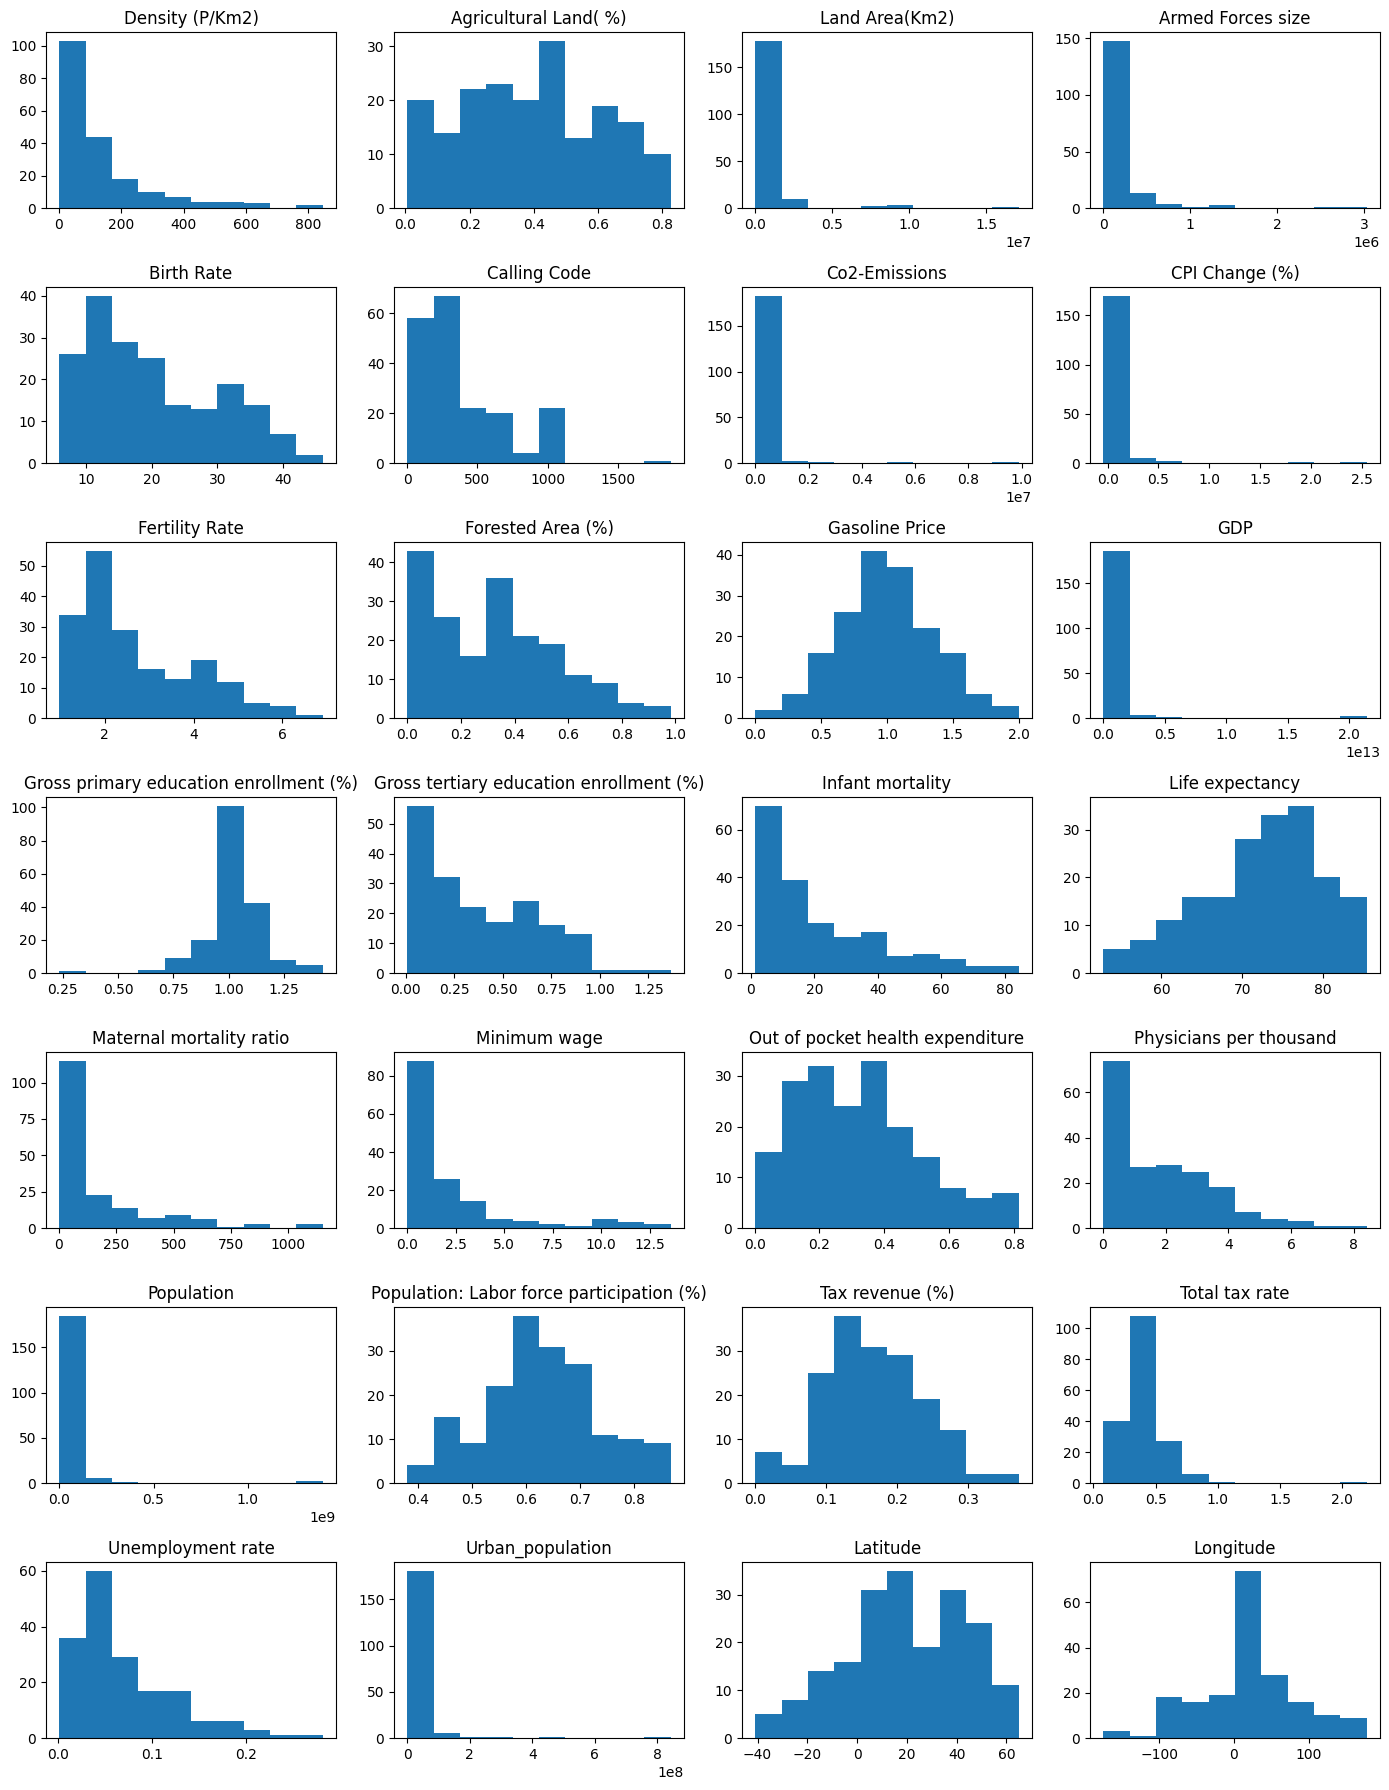

In [9]:
data_hist = data[numeric_colums]
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(14, 18))
axes = axes.ravel()
for i in range(len(data_hist.columns)):
    axes[i].hist(data_hist.iloc[:, i], bins=10)
    axes[i].set_title(data_hist.columns[i])
plt.tight_layout()
plt.show()

Без выбросов в данной задаче никак, у нас имеется ряд стран которыен не поддаются общим тенденциям по миру, связанно это в первую очередь с историческими особенностями, например нейтралитет Швейцарии, посмотрим на диаграммы рассеивания

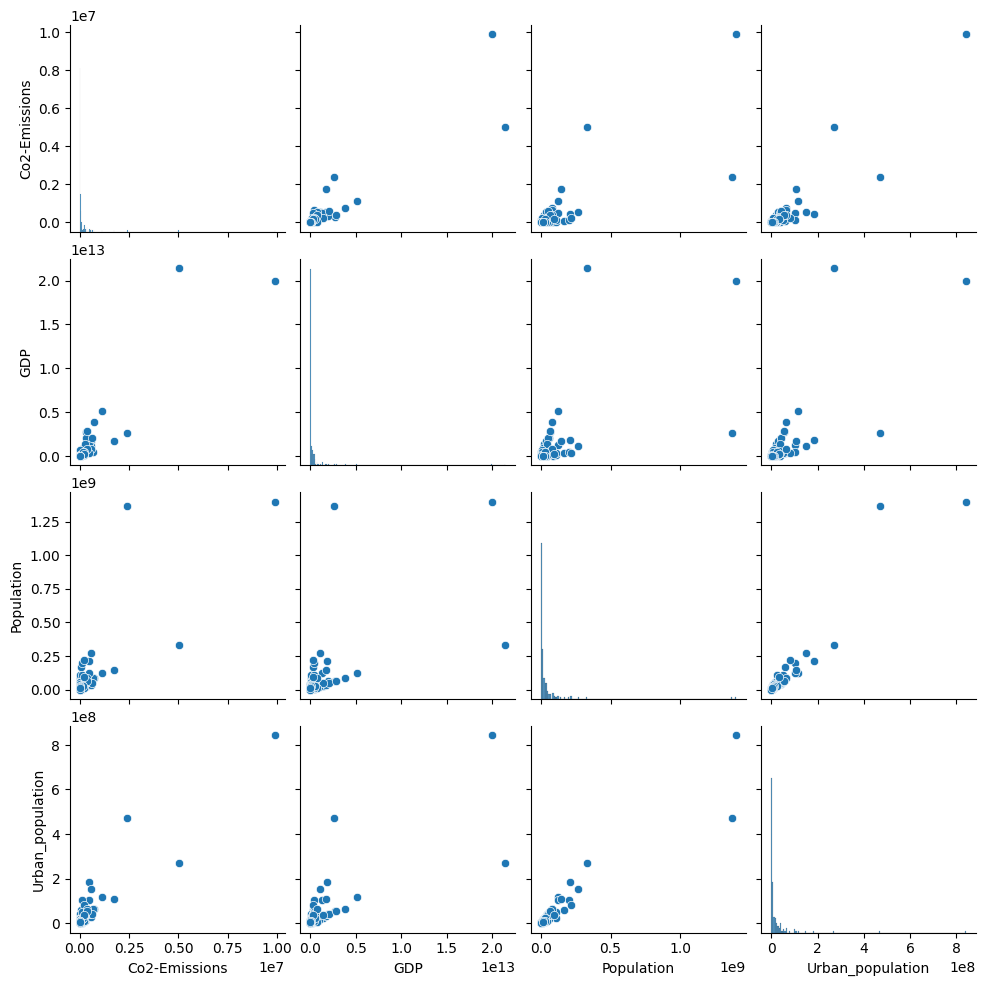

In [10]:
sea.pairplot(data_hist[['Co2-Emissions', 'GDP', 'Population', 'Urban_population']])
plt.show()

Следующим этапом станет проверка коррелируемости признаков

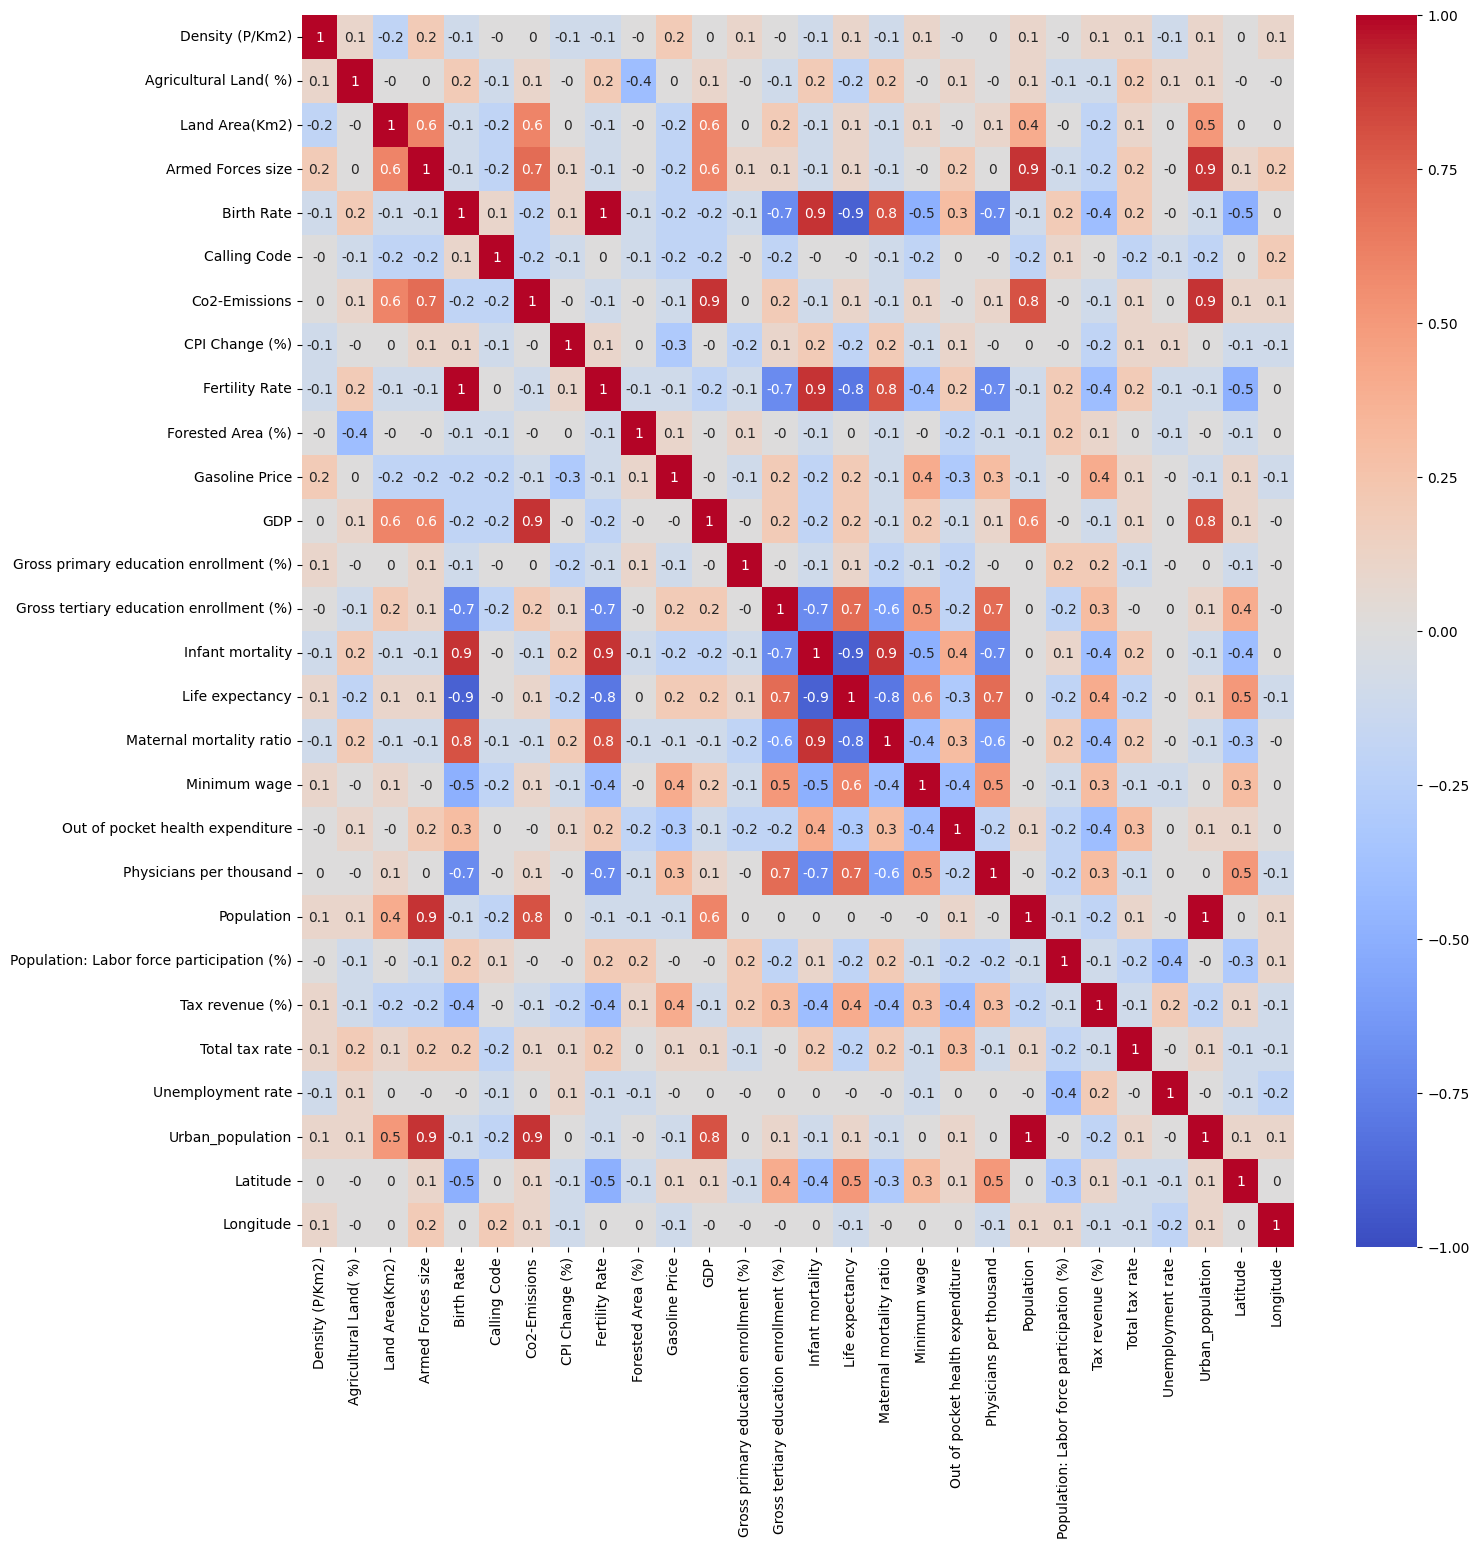

In [11]:
plt.figure(figsize=(16, 16))
sea.heatmap(round(data_hist.corr(), 1), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

Как ни странно, но матрица корреляции показывает, что размер вооруженных сильно коррелирует с общей численностью населения, так же выбросы CO2 зависят от численности городского населения и можно заметить много других логичных зависимостей. Если посмотреть на телефонный код страны, то он слабо коррелирует со всеми признаками, что тривиально. Так же можно заметить, что есть и другие признаки слабо коррелирующие со всеми остальными, в целом их можно исключить, но не будем этого делать.

Единственное что удивило меня так это сильная корреляция между ВВП и выбросами CO2, хотя если задуматься то станет ясно, что чем выше промышленная мощь тем больше выбросов, самый банальный пример это Китай, с его промышленной базой. Однако стоит понимать что в ближайшие десятилетия эта связть может исчезнуть, так как мы сейчас находимся в эпохе перехода от старых "грязных" методов производства к более "чистым".

### 3. Обработка пропущенных значений

Тут у нас имеется 2 пути, первый связан с тем чтобы обработать пропущенные значения собственными силами, а именно провести оценку по региону и историческим предпоссылкам, второй воспользоваться удалением этих стран из рассмотрения.

Первый метод более трудоемкий для исследователя, однако он дает полную картинку по миру.

Второй же метод более простой, если учесть что пропущенные значения принадлежат страннам со сложным юридическим статусом или крайне малым вкладом по каждому признаку, например Палестинская территория крайне мала и не вносит большого вклада в мировую статистику. Забегая вперед можно сказать что это является выбросом за счет сильного удаления от мировой тенденции и точно требует удаления.

Мной принято решение совместить эти два подхода и удалить страны-выбросы и обработать те страны, что не сильно выбиваются из мировых тенденций.

Посмотрим сколько стран имеет пропущенные значения

In [12]:
Nan_country = data[data.isnull().any(axis=1)]
Nan_country

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
3,Andorra,164.0,AD,0.400,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,...,0.364,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801
5,Antigua and Barbuda,223.0,AG,0.205,443.0,0.0,15.33,1.0,"St. John's, Saint John",557.0,...,0.243,2.76,97118.0,NaN,0.165,0.430,NaN,23800.0,17.060816,-61.796428
8,Australia,3.0,AU,0.482,7741220.0,58000.0,12.60,61.0,Canberra,375908.0,...,0.196,3.68,25766605.0,0.655,0.230,0.474,0.0527,21844756.0,-25.274398,133.775136
9,Austria,109.0,AT,0.324,83871.0,21000.0,9.70,43.0,Vienna,61448.0,...,0.179,5.17,8877067.0,0.607,0.254,0.514,0.0467,5194416.0,47.516231,14.550072
11,The Bahamas,39.0,BS,0.014,13880.0,1000.0,13.97,1.0,"Nassau, Bahamas",1786.0,...,0.278,1.94,389482.0,0.746,0.148,0.338,0.1036,323784.0,25.034280,-77.396280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Uzbekistan,79.0,UZ,0.629,447400.0,68000.0,23.30,998.0,Tashkent,91811.0,...,0.427,2.37,33580650.0,0.651,0.148,0.316,0.0592,16935729.0,41.377491,64.585262
189,Vanuatu,25.0,VU,0.153,12189.0,NaN,29.60,678.0,Port Vila,147.0,...,0.089,0.17,299882.0,0.699,0.178,0.085,0.0439,76152.0,-15.376706,166.959158
190,Venezuela,32.0,VE,0.245,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,0.458,1.92,28515829.0,0.597,NaN,0.733,0.0880,25162368.0,6.423750,-66.589730
192,Yemen,56.0,YE,0.446,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,0.810,0.31,29161922.0,0.380,NaN,0.266,0.1291,10869523.0,15.552727,48.516388


Достаточно много, зато видно что страна Андора - это карликовое государство и его можно удалить за счет своего малого вклада в общую картину.

С другой же стороны есть Австралия, которая достаточно большая страна с огромным потенциалом и тут надо проводить обработку.

Далее для удобства я воспользуюсь Microsoft Excel и приведу ниже уже готовый результат.

В резултьтате страны с большим количеством пропущенных значений, такие как Южный Судан и Палестинская автономия и др. мы исключим из рассмотрения, аналогично сделаем с карликовыми государствами и островами Полинезии и Карибского бассейна, за счет их малого вклада в общую картину мира (так как большинство стран достаточно большие).

Большие страны мы заполним данными из открытых источников за 2021\2022 года.

Такие страны как Северная Корея и Сомали о которых практически ничего не известно так же удалим, не смотря на их размер и значимость.

In [13]:
data = pd.read_excel('world-data-2023-without-nan.xlsx')
data.to_csv('world-data-2023-without-nan.csv', index=False)
data

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60.0,AF,0.581,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0,33.939110,67.709953
1,Albania,105.0,AL,0.431,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0,41.153332,20.168331
2,Algeria,18.0,DZ,0.174,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0,28.033886,1.659626
3,Angola,26.0,AO,0.475,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0,-11.202692,17.873887
4,Argentina,17.0,AR,0.543,2780400.0,105000.0,17.02,54.0,Buenos Aires,201348.0,...,0.176,3.96,44938712.0,0.613,0.101,1.063,0.0979,41339571.0,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Venezuela,32.0,VE,0.245,912050.0,343000.0,17.88,58.0,Caracas,164175.0,...,0.458,1.92,28515829.0,0.597,0.201,0.733,0.0880,25162368.0,6.423750,-66.589730
163,Vietnam,314.0,VN,0.393,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,...,0.435,0.82,96462106.0,0.774,0.191,0.376,0.0201,35332140.0,14.058324,108.277199
164,Yemen,56.0,YE,0.446,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,...,0.810,0.31,29161922.0,0.380,0.148,0.266,0.1291,10869523.0,15.552727,48.516388
165,Zambia,25.0,ZM,0.321,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,...,0.275,1.19,17861030.0,0.746,0.162,0.156,0.1143,7871713.0,-13.133897,27.849332


Проверим себя и убедимся, что все обработали.

In [14]:
Nan_country = data[data.isnull().any(axis=1)]
Nan_country

,Country,Density (P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
9,The Bahamas,39.000,BS,0.014,13880.0,1000.0,13.97,1.0,"Nassau, Bahamas",1786.0,...,0.278,1.94,389482.0,0.746,0.148,0.338,0.1036,323784.0,25.034280,-77.396280
17,Bhutan,20.000,BT,0.136,38394.0,6000.0,17.26,975.0,Thimphu,1261.0,...,0.198,0.42,727145.0,0.667,0.160,0.353,0.0234,317538.0,27.514162,90.433601
28,Cambodia,95.000,KH,0.309,181035.0,191000.0,22.46,855.0,Phnom Penh,9919.0,...,0.594,0.17,16486542.0,0.823,0.171,0.231,0.0068,3924621.0,12.565679,104.990963
31,Central African Republic,8.000,CF,0.082,622984.0,8000.0,35.35,236.0,Bangui,297.0,...,0.396,0.06,4745185.0,0.720,0.086,0.733,0.0368,1982064.0,6.611111,20.939444
36,Republic of the Congo,16.000,NaN,0.311,342000.0,12000.0,32.86,242.0,Brazzaville,3282.0,...,0.438,0.12,5380508.0,0.694,0.090,0.543,0.0947,3625010.0,-0.228021,15.827659
48,El Salvador,313.000,SV,0.764,21041.0,42000.0,18.25,503.0,San Salvador,7169.0,...,0.279,1.57,6453553.0,0.591,0.181,0.364,0.0411,4694702.0,13.794185,-88.896530
75,Republic of Ireland,72.000,NaN,0.645,70273.0,9000.0,12.50,353.0,Dublin,37711.0,...,0.152,3.31,5007069.0,0.621,0.183,0.261,0.0493,3133123.0,53.412910,-8.243890
79,Japan,347.000,JP,0.123,377944.0,261000.0,7.40,81.0,Tokyo,1135886.0,...,0.131,2.41,126226568.0,0.617,0.119,0.467,0.0229,115782416.0,36.204824,138.252924
88,Lesotho,71.000,LS,0.776,30355.0,2000.0,26.81,266.0,Maseru,2512.0,...,0.169,0.07,2125268.0,0.679,0.316,0.136,0.2341,607508.0,-29.609988,28.233608
89,Liberia,53.000,LR,0.280,111369.0,2000.0,33.04,231.0,Monrovia,1386.0,...,0.196,0.04,4937374.0,0.763,0.129,0.462,0.0281,2548426.0,6.428055,-9.429499


Проверим какие признаки остались с пропущенными значениями

In [15]:
nan_columns = data.isna().any()
nan_columns

Country                                      False
Density (P/Km2)                              False
Abbreviation                                  True
Agricultural Land( %)                        False
Land Area(Km2)                               False
Armed Forces size                            False
Birth Rate                                   False
Calling Code                                 False
Capital/Major City                            True
Co2-Emissions                                False
CPI                                          False
CPI Change (%)                               False
Currency-Code                                 True
Fertility Rate                               False
Forested Area (%)                            False
Gasoline Price                               False
GDP                                          False
Gross primary education enrollment (%)       False
Gross tertiary education enrollment (%)      False
Infant mortality               

Остались только текстовые данные, такие как столица, код страны и язык, вряд ли они как-то влияют на все другие признаки, поэтому ниже мы от них избавимся.

### 4. Обработка категориальных признаков

У нас имеются текстовые признаки, с которыми стоит поработать, они никак не могут влиять на другие признаки, к тому же являются уникальными в некоторых случаях, а значит стоит просто от них отказаться, ниже приведем новую таблицу.

Чуть не забыл про числовой код страны, он тоже будет исключен по причине своей ненужности в исследовании.

In [16]:
data_without_str = data.drop(['Abbreviation', 'Official language',
                              'Calling Code', 'Capital/Major City', 
                              'Currency-Code', 'Largest city',
                              'Country'], axis=1)
data_without_str

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,60.0,0.581,652230.0,323000.0,32.49,8672.0,149.90,0.023,4.47,0.021,...,0.784,0.28,38041754.0,0.489,0.093,0.714,0.1112,9797273.0,33.939110,67.709953
1,105.0,0.431,28748.0,9000.0,11.78,4536.0,119.05,0.014,1.62,0.281,...,0.569,1.20,2854191.0,0.557,0.186,0.366,0.1233,1747593.0,41.153332,20.168331
2,18.0,0.174,2381741.0,317000.0,24.28,150006.0,151.36,0.020,3.02,0.008,...,0.281,1.72,43053054.0,0.412,0.372,0.661,0.1170,31510100.0,28.033886,1.659626
3,26.0,0.475,1246700.0,117000.0,40.73,34693.0,261.73,0.171,5.52,0.463,...,0.334,0.21,31825295.0,0.775,0.092,0.491,0.0689,21061025.0,-11.202692,17.873887
4,17.0,0.543,2780400.0,105000.0,17.02,201348.0,232.75,0.535,2.26,0.098,...,0.176,3.96,44938712.0,0.613,0.101,1.063,0.0979,41339571.0,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,32.0,0.245,912050.0,343000.0,17.88,164175.0,274027.00,2.549,2.27,0.527,...,0.458,1.92,28515829.0,0.597,0.201,0.733,0.0880,25162368.0,6.423750,-66.589730
163,314.0,0.393,331210.0,522000.0,16.75,192668.0,163.52,0.028,2.05,0.481,...,0.435,0.82,96462106.0,0.774,0.191,0.376,0.0201,35332140.0,14.058324,108.277199
164,56.0,0.446,527968.0,40000.0,30.45,10609.0,157.58,0.081,3.79,0.010,...,0.810,0.31,29161922.0,0.380,0.148,0.266,0.1291,10869523.0,15.552727,48.516388
165,25.0,0.321,752618.0,16000.0,36.19,5141.0,212.31,0.092,4.63,0.652,...,0.275,1.19,17861030.0,0.746,0.162,0.156,0.1143,7871713.0,-13.133897,27.849332


### 5. Нормализация признаков

Проведение нормализации необходимо, так как у нас присутствует много признаков с большим диапозоном значений.

In [17]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data_without_str)

name_country = list(data['Country'])
name_columns = list(data_without_str.columns)

scaled_data = pd.DataFrame(d, index = name_country, columns = name_columns)
scaled_data

,Density (P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
Afghanistan,0.088093,0.701220,0.038129,0.106565,0.657510,0.000864,0.000186,0.021310,0.588533,0.021363,...,0.958060,0.032105,0.027139,0.223361,0.250000,0.644964,0.392666,0.011575,0.706944,0.611988
Albania,0.155587,0.518293,0.001664,0.002969,0.135585,0.000446,0.000073,0.017823,0.107926,0.285860,...,0.676278,0.141498,0.001962,0.362705,0.500000,0.290946,0.435742,0.002025,0.775091,0.444831
Algeria,0.025100,0.204878,0.139282,0.104586,0.450605,0.015151,0.000191,0.020147,0.344013,0.008138,...,0.298820,0.203329,0.030725,0.065574,1.000000,0.591048,0.413314,0.037335,0.651163,0.379754
Angola,0.037099,0.571951,0.072898,0.038601,0.865171,0.003495,0.000594,0.078652,0.765599,0.471007,...,0.368283,0.023781,0.022691,0.809426,0.247312,0.418108,0.242079,0.024938,0.280529,0.436763
Argentina,0.023600,0.654878,0.162599,0.034642,0.267641,0.020341,0.000488,0.219682,0.215852,0.099695,...,0.161206,0.469679,0.032074,0.477459,0.271505,1.000000,0.345319,0.048996,0.023468,0.150240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.046098,0.291463,0.053325,0.113164,0.289315,0.016583,1.000000,1.000000,0.217538,0.536114,...,0.530799,0.227111,0.020323,0.444672,0.540323,0.664293,0.310075,0.029804,0.447031,0.139787
Vietnam,0.469054,0.471951,0.019354,0.172220,0.260837,0.019463,0.000235,0.023247,0.180438,0.489318,...,0.500655,0.096314,0.068940,0.807377,0.513441,0.301119,0.068352,0.041869,0.519148,0.754624
Yemen,0.082094,0.536585,0.030862,0.013197,0.606099,0.001060,0.000214,0.043781,0.473862,0.010173,...,0.992136,0.035672,0.020786,0.000000,0.397849,0.189217,0.456390,0.012847,0.533264,0.544503
Zambia,0.035599,0.384146,0.044001,0.005279,0.750756,0.000507,0.000414,0.048043,0.615514,0.663276,...,0.290957,0.140309,0.012700,0.750000,0.435484,0.077314,0.403702,0.009291,0.262287,0.471837


### 6. Разбиение данных на тестовую и обучающую выборки

Для предсказания ВВП страны будем использовать все входные признаки.

In [18]:
X = scaled_data.drop('GDP', axis=1)
y = scaled_data['GDP']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

### 7. Линейная регрессия

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)
print(lr_model.coef_)

[-7.86462798e-03  3.34130931e-02 -6.23689991e-02  2.31478389e-01
 -1.16784905e-01  1.51915474e+00  4.33247478e-02 -6.45028690e-02
  1.09376843e-01  1.75039768e-02  2.76258082e-04  1.05608682e-02
  1.02626594e-02  8.12563953e-02  2.35065024e-02 -3.05819162e-02
  7.21471779e-02  8.91058984e-03 -3.00983662e-02 -3.81806185e-01
  8.73841257e-03 -2.75601160e-02 -2.79577114e-02  2.65155940e-02
 -2.36420741e-01 -2.08199966e-02 -5.91138119e-02]


Посмотрим за что отвечает каждый коэффициент

In [21]:
lr_model.coef_*X.std()/X.std()

Density (P/Km2)                             -0.007865
Agricultural Land( %)                        0.033413
Land Area(Km2)                              -0.062369
Armed Forces size                            0.231478
Birth Rate                                  -0.116785
Co2-Emissions                                1.519155
CPI                                          0.043325
CPI Change (%)                              -0.064503
Fertility Rate                               0.109377
Forested Area (%)                            0.017504
Gasoline Price                               0.000276
Gross primary education enrollment (%)       0.010561
Gross tertiary education enrollment (%)      0.010263
Infant mortality                             0.081256
Life expectancy                              0.023507
Maternal mortality ratio                    -0.030582
Minimum wage                                 0.072147
Out of pocket health expenditure             0.008911
Physicians per thousand     

Видим интересную закономерность, самый высокий ввп должен быть у стран с самым высоким выбросом CO2, то есть высокий ввп соответсует странам с развитой промышленностью, такие как Китай, США, Япония, Германия и пд.

In [22]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("MSE_train: ", MSE_train)
print("MSE_test: ", MSE_test)
print("R2_train: ", R2_train)
print("R2_test: ", R2_test)

MSE_train:  0.0012974436618120192
MSE_test:  0.0007619576420738064
R2_train:  0.9137846903777905
R2_test:  0.551401050289219


Судя по малым ошибкам и высоким коэффициентам детерминации у нас имеется неплохое соответствие модели с реальными результатами.

Посмотрим теперь как влияет число городских жителей на уровень ВВП.

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Urban_population']], y_train)

y_train_predict = lr_model.predict(X_train[['Urban_population']])
y_test_predict  = lr_model.predict(X_test[['Urban_population']])

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("MSE_train: ", MSE_train)
print("MSE_test: ", MSE_test)
print("R2_train: ", R2_train)
print("R2_test: ", R2_test)

MSE_train:  0.005855856520737454
MSE_test:  0.0006393362320930472
R2_train:  0.6108775294847744
R2_test:  0.6235938241286019


Не видно больших различий между, к тому же можно сделать еще одно заключение, если рассматривать модель полностью, то главенствующим показателем является уровень выбросов CO2, а если мы рассматриваем городское население, то видно, что число городских жителей тоже вносит значимый вклад, что не удивительно так как промышленность сконцентрирована в основном в городах.

Посмотрим теперь как влияет число городских жителей и выброс CO2 на уровень ВВП.

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train[['Urban_population', 'Co2-Emissions']], y_train)

y_train_predict = lr_model.predict(X_train[['Urban_population', 'Co2-Emissions']])
y_test_predict  = lr_model.predict(X_test[['Urban_population', 'Co2-Emissions']])

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("MSE_train: ", MSE_train)
print("MSE_test: ", MSE_test)
print("R2_train: ", R2_train)
print("R2_test: ", R2_test)

MSE_train:  0.0018080652781336509
MSE_test:  0.0006759561061672699
R2_train:  0.8798538138035591
R2_test:  0.6020340468639148


Аналогичная ситуация :)

### 8. Случайный лес

In [25]:
rf_model = ensemble.RandomForestRegressor(n_estimators = 100)
rf_model.fit(X_train, y_train)

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)

print("MSE_train: ", MSE_train)
print("MSE_test: ", MSE_test)

MSE_train:  0.0018080652781336509
MSE_test:  0.0006759561061672699


Достаточно маленькие ошибки :)

In [26]:
importances = rf_model.feature_importances_
importances

array([1.58538770e-03, 5.44149401e-04, 2.96505367e-02, 2.95501563e-02,
       4.09849702e-03, 6.42882691e-01, 6.23319438e-04, 2.48034752e-03,
       1.38500697e-03, 5.76484482e-03, 2.06625246e-03, 2.96145997e-04,
       7.15704466e-04, 1.48347503e-03, 1.79524214e-03, 8.98110801e-04,
       2.92719046e-03, 4.56656838e-03, 2.50792341e-03, 1.23429514e-01,
       8.42700905e-04, 4.71481653e-03, 6.68694591e-04, 4.96236470e-04,
       1.23798080e-01, 7.96917635e-04, 9.43148981e-03])

In [27]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances[importances >= .01]

Co2-Emissions        0.642883
Urban_population     0.123798
Population           0.123430
Land Area(Km2)       0.029651
Armed Forces size    0.029550
dtype: float64

Получается довольно интересная картина, вклад в ВВП страны самый большой за счет выбросов CO2 (промышленной мощи), второй по значимости это население страны, дальше идут менее значимые.

### 9. Метод k-ближайших соседей

In [28]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

y_train_prediction = knn.predict(X_train)
y_test_prediction = knn.predict(X_test)

err_train = 1 - knn.score(X_train, y_train)
err_test = 1 - knn.score(X_test, y_test)

print("ERR_train: ", err_train)
print("ERR_test: ", err_test)

ERR_train:  0.6499481360253391
ERR_test:  0.6655926039669597


Малые, но не слишком ошибки :| \
Подберем оптимальное значение количества соседей.

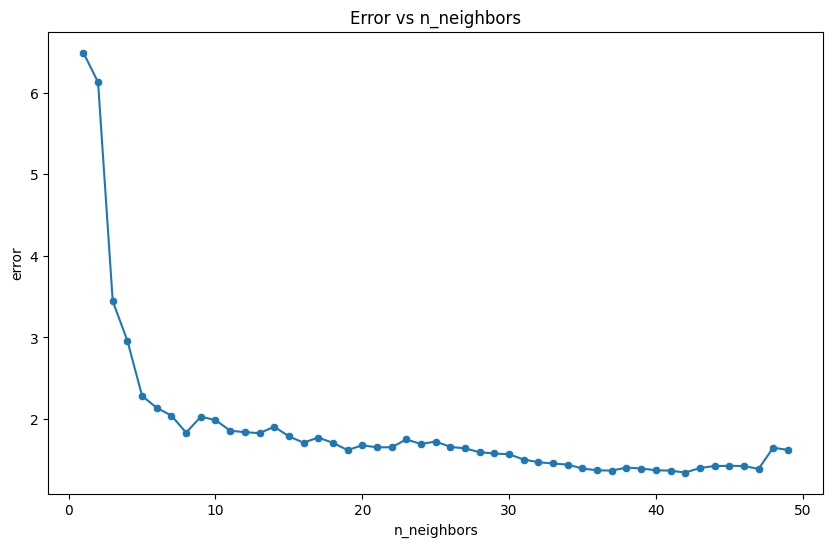

In [29]:
nnb = [i for i in range(1, 50)]
knn = KNeighborsRegressor(n_neighbors=10)

grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err_knn = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
best_cv_err_knn, best_n_neighbors

results = grid.cv_results_
scores_mean = results['mean_test_score']

plt.figure(figsize=(10, 6))
sea.lineplot(x = nnb, y= 1 - scores_mean)
sea.scatterplot(x = nnb, y= 1 - scores_mean)
plt.xlabel('n_neighbors')
plt.ylabel('error')
plt.title('Error vs n_neighbors')
plt.show()

Лучший результат модель показывает при 42 соседях.

### 10. Общий вывод

В данной работе мы познакомились с датасетом Global Country Information Dataset 2023. \
Мы выяснили некоторые интересные подробности о ВВП стран, а именно о том из каких базовых факторов он произрастает. Перед нами стояла задача дитально изучить данные в первую очередь на наличие пропущенных значений, а именно как с этим справится. Я предложил два варианта решения этой проблемы: для значимых стран найти самостоятельно и заполнить пропущенные значения данными за 2021/2022 года, а не значимые страны удалить или удалить те, о которых практически ничего не известно.

Запустив линейную регрессию, случайный лес и метод ближайших соседей мы получили достаточно правдивые результаты, что в сумме с малыми ошибками говорит о правильности наших действий по работе с этими данными. Лучше всего себя показали случайный лес и линейная регрессия.

В целом могу сказать, что этот датасет скорее нужен для анализа данных и нахождения различных и порой неожиданных зависимостей, однако и машинное обучение неплохо справляется с этими задачами.

## Домашнее задание №6

В рамках данного задания нам необходимо создать полносвязную неглубокую нейронную сеть и RandomFortest. Так как уже ранее был реализован случайный лес, то просто сошлемся на его результаты.

### 1. Нейронная сеть

In [32]:
mlp_model = MLPRegressor(hidden_layer_sizes = (400,),
                          solver = 'adam', 
                          activation = 'relu',
                          random_state = 12,
                          max_iter = 2000)

mlp_model.fit(X_train, y_train)

y_train_predict = mlp_model.predict(X_train)
y_test_predict = mlp_model.predict(X_test)

error_test = 1 - mlp_model.score(X_test, y_test)
error_train = 1 - mlp_model.score(X_train, y_train)

print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.09458433033011437
Error on test =  0.4044381762140088


In [33]:
#cnf_matrix = confusion_matrix(y_train, y_train_predict)
#sea.heatmap(cnf_matrix, annot=True, cmap="PiYG", xticklabels=['True', 'False'], yticklabels=['True', 'False'])
#plt.show()

#### 1.1. Подбор оптимального параметра альфа

In [34]:
list_alpha = np.logspace(-3, 2, 21)
test_err, train_err = [], []
test_acc, train_acc = [], []

for alpha in list_alpha:
    mlp_model = MLPRegressor(alpha = alpha, hidden_layer_sizes = (400,),
                             solver = "adam", activation = "relu",
                             max_iter = 2000, random_state = 12)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))
    train_acc.append(mlp_model.score(X_train, y_train))
    test_acc.append(mlp_model.score(X_test, y_test))


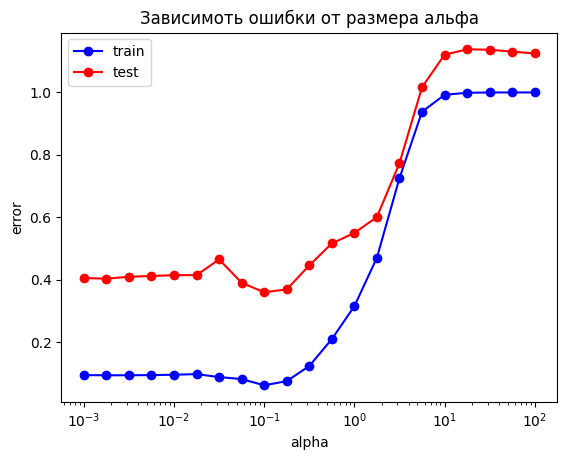

In [35]:
plt.semilogx(list_alpha, train_err, "b-o", label = "train")
plt.semilogx(list_alpha, test_err, "r-o", label = "test")
plt.title('Зависимоть ошибки от размера альфа')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
plt.show()

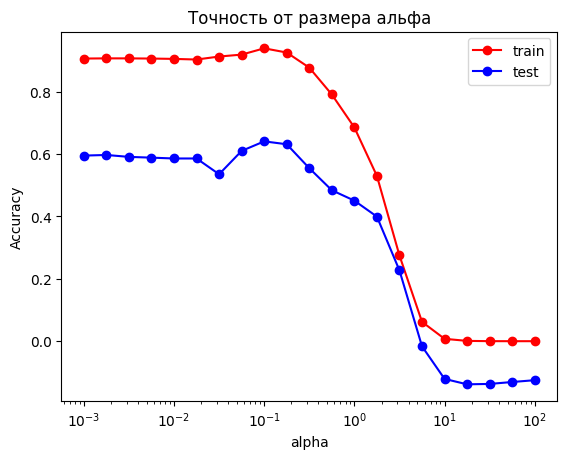

In [36]:
plt.semilogx(list_alpha, train_acc, 'r-o', label = 'train')
plt.semilogx(list_alpha, test_acc, 'b-o', label = 'test')
plt.title('Точность от размера альфа')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Если проанализировать график зависимости ошибки и точности от alpha можно сделать вывод, что наиболее оптимальное значение последнего располагается в точке минимальной ошибки на тестовой и на тренировочной выборках, теперь найдем его.

In [37]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
alpha_opt = list_alpha[test_err == min_test_err][0]
alpha_opt

0.1

Собственно при альфа равно 0.1 имеем минимальную ошибку и он то на и нужен.

#### 1.2. Перебор количества нейронов

In [42]:
layers_list = [200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000, 1250, 1500, 1750, 2000]
test_err, train_err = [], []
test_acc, train_acc = [], []

for layer in layers_list:
    mlp_model = MLPRegressor(alpha = alpha_opt, hidden_layer_sizes = layer,
                              solver = "adam", activation = "relu",
                              max_iter = 2000, random_state = 12)
    mlp_model.fit(X_train, y_train)

    train_err.append(1 - mlp_model.score(X_train, y_train))
    test_err.append(1 - mlp_model.score(X_test, y_test))
    train_acc.append(mlp_model.score(X_train, y_train))
    test_acc.append(mlp_model.score(X_test, y_test))

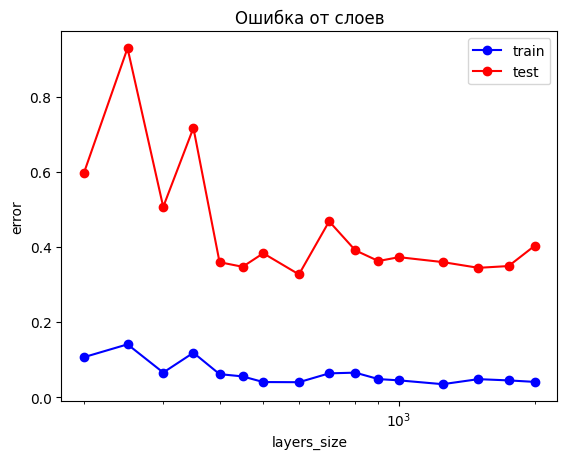

In [43]:
plt.semilogx(layers_list, train_err, 'b-o', label = 'train')
plt.semilogx(layers_list, test_err, 'r-o', label = 'test')
plt.title('Ошибка от слоев')
plt.xlabel('layers_size')
plt.ylabel('error')
plt.legend()
plt.show()

In [44]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

arr = test_err == min_test_err
for i, layer in enumerate(layers_list):
    if (arr[i]):
        layer_opt = layer
layer_opt

600

Собственно при таком количестве слоев имеем минимальную ошибку.

Теперь зная все необходимые гиперпараметры обучим заново модель и посмотрим на результаты.

In [46]:
mlp_model_opt = MLPRegressor(alpha = alpha_opt,
                             hidden_layer_sizes = layer_opt,
                             solver = 'adam', 
                             activation = 'relu',
                             random_state = 12,
                             max_iter = 2000)
mlp_model_opt.fit(X_train, y_train)

print("train error", 1 - mlp_model.score(X_train, y_train))
print("test error", 1 - mlp_model.score(X_test, y_test))

train error 0.04053803934900413
test error 0.4032931109205471


Результат, кажется, вышел чуточку лучше, чем мне изначально казалось, собственно получается, что среди всех метод самым лучшим по точности оказалась нейронная сеть.

### 2. Вывод

На данном этапе выполнения домашнего задания, была обучена полносвязная нейронная сеть и подобраны оптимальные значения гиперпараметров альфа и количества скрытых слоев. В результате, полученная оптимальная модель продемонстрировала результаты, превосходящие классические методы машинного обучения. Задача далеко не тривиальная, за счет своей сложности: выборка маленькая, параметров много, пропущенные значений достигают свыше 20%, к тому же это не задача классификации, это задача регрессии. В совокупности все факторы могут повлиять на точность классических методов, а на нейронную сеть по всей видимости - нет.


В конечном итоге по всему заданию в jupyter notebook хочется сказать что я освоил новый тип задач, это регрессию. И получается что за 4 курс бакалавра я освоил классификацию и успешно с ней справился, а в этом году уже "попытал счастья" в регрессии, задачи схожие, однако есть различия, которые стоит учитывать для правильной интерпритации результатов.